In [1]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"D:\SEMESTER 3\Ishanth guptha\assignment 8\student\Student_performance_data _.csv")

print(df.head())


   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [6]:
#Defining target variable and feature variables
y = df['GPA']

X = df.drop(columns=['StudentID', 'GPA', 'GradeClass']) 


In [7]:
#Standardizing the feature variables

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=81)


In [10]:
lnr_model = LinearRegression()
lnr_model.fit(X_train, y_train)


LinearRegression()

In [16]:
import numpy as np
y_pred = lnr_model.predict(X_test)

print("R-squared:", r2_score(y_test, y_pred))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)


R-squared: 0.9561447040322378
Root Mean Squared Error: 0.1925711597399028


In [17]:
#View feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lnr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)


              Feature  Coefficient
7     ParentalSupport     0.169146
4     StudyTimeWeekly     0.165226
6            Tutoring     0.116099
8     Extracurricular     0.095628
9              Sports     0.088826
10              Music     0.059771
1              Gender     0.014132
2           Ethnicity     0.002789
3   ParentalEducation     0.001756
11       Volunteering    -0.001225
0                 Age    -0.007369
5            Absences    -0.844469


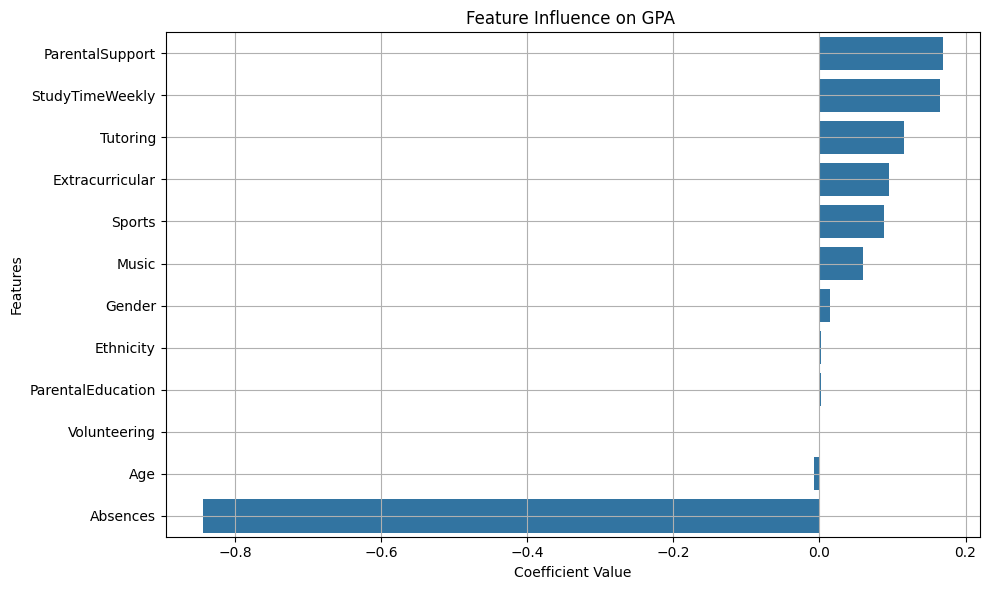

In [19]:
#getting Visualizations of each feature
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Influence on GPA ')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
# Result:
# A high positive coefficient means the feature helps increase GPA.
# A high negative coefficient means the feature lowers GPA.
# An R-squared value close to 1 means the model does a great job explaining GPA scores.



In [ ]:
#Process of feature engineering 

# 1. Selecting Features:
# We excluded 'StudentID' (only an identifier) and 'GradeClass' (not the target for this model).
# We kept relevant columns like Age, Gender, Study Time, Absences, and others
# that are likely to influence student GPA.

# 2. Transforming Features:
# We applied StandardScaler to normalize all features to a similar scale.
# This ensures that no single feature dominates the model due to its range.
# Encoding wasn't necessary since categorical values (e.g., Gender, Tutoring)
# were already represented numerically (e.g., 0, 1).s

# 3. Preparing for Modeling:
# After scaling, we split the data into training and test sets.
# Then, we trained a Linear Regression model using the transformed features to predict GPA.
